# Context
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

 

# Objective
To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

 

# Data Description
The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

# Data Dictionary

S.No.: Serial number

Name: Name of the car which includes brand name and model name

Location: Location in which the car is being sold or is available for purchase (cities)

Year: Manufacturing year of the car

Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km

Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

Transmission: The type of transmission used by the car (Automatic/Manual)

Owner: Type of ownership

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in CC

Power: The maximum power of the engine in bhp

Seats: The number of seats in the car

New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)

Price: The price of the used car in INR Lakhs

# 1. Loading Libraries and Importing Data

In [1]:
%load_ext nb_black
%matplotlib inline

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [2]:
data = pd.read_csv("used_cars_data.csv")

<IPython.core.display.Javascript object>

# 2. Data Preprocessing and EDA

In [3]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 7253 rows and 14 columns.


<IPython.core.display.Javascript object>

In [4]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


<IPython.core.display.Javascript object>

In [5]:
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


<IPython.core.display.Javascript object>

In [6]:
data.sample(
    50, random_state=2
)  # using random state to return the same sample set in future use

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4584,4584,Tata Tigor 1.05 Revotorq XT,Kochi,2018,28973,Diesel,Manual,First,24.7 kmpl,1047 CC,69 bhp,5.0,NaN,6.64
6505,6505,Volkswagen Vento Diesel Highline,Chennai,2011,76041,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
3675,3675,Maruti Swift VDI,Ahmedabad,2012,65000,Diesel,Manual,First,22.9 kmpl,1248 CC,74 bhp,5.0,NaN,3.90
5654,5654,Hyundai i20 Magna Optional 1.2,Kochi,2014,42315,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,5.0,NaN,4.79
4297,4297,Toyota Camry 2.5 G,Mumbai,2014,68400,Petrol,Automatic,First,12.98 kmpl,2494 CC,178.4 bhp,5.0,NaN,13.50
2603,2603,Mercedes-Benz New C-Class 220 CDI AT,Jaipur,2010,74213,Diesel,Automatic,First,14.84 kmpl,2143 CC,170 bhp,5.0,NaN,11.50
4337,4337,Volkswagen Vento Petrol Highline AT,Kochi,2014,32283,Petrol,Automatic,Second,14.4 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.41
6625,6625,Maruti Swift VDI BSIV,Kolkata,2012,72000,Diesel,Manual,First,17.8 kmpl,1248 CC,NaN,5.0,NaN,NaN
2846,2846,Skoda Superb Elegance 1.8 TSI AT,Kochi,2011,73783,Petrol,Automatic,Second,13.7 kmpl,1798 CC,157.75 bhp,5.0,NaN,5.23
1237,1237,Audi Q3 2.0 TDI Quattro,Hyderabad,2013,60000,Diesel,Automatic,First,17.32 kmpl,1968 CC,184 bhp,5.0,NaN,21.00


<IPython.core.display.Javascript object>

* `Price` is going to be my dependant variable.
* The `S.No` column is duplicating the index so it can be dropped.
* The `Name` column will likely be tricky as it will have many unique values, I will have to be careful how I proceed with it.
* The `Location`, `Fuel_Type`, `Transmission`, and `Owner_Type` columns look to be categorical data and will have to be converted later.
* The `Mileage`, `Engine`, and `Power` columns are strings and will need to be converted to numeric values.
* There are a lot of missing values in the `New_Price` and `Price` columns that will have to be dealt with. 

In [7]:
# creating a copy of the data to keep the original unchanged
df = data.copy()

<IPython.core.display.Javascript object>

In [8]:
df.info()  # initial look into the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


<IPython.core.display.Javascript object>

* `New_Price` only has 1006 data points in 7253 entries and will need to be dropped as there is not enough data to be useful.  
* `Mileage`, `Engine`, `Power`, and `Seats` have missing values and will need to be cleaned up after they are converted into numerals.
* Dependant variable `Price` is already a *float* type 

In [9]:
# Checking for duplicated values (This would be more important with a larger data set)
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [10]:
# Dropping columns that will not be used.
df.drop(["S.No.", "New_Price"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 680.1+ KB


<IPython.core.display.Javascript object>

* Dropping columns brought the total number of columns to 12

In [12]:
# looking at the columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64

<IPython.core.display.Javascript object>

In [13]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7078,385,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

* The unique count for `Name` which includes make and model is lower then I expected. 
* All cars in the data set are from between the years 1996 and 2019. 75% of cars in the data set were made on or after 2011.
* The `Kilometers_Driven` has a max value of 6,500,000 or roughly 4,039,000 miles. That seems to be an outlier that will have to be dealt with. 
* The majority of cars have 5 seats, the min and max are 0 and 10. Zero seats doesnt seem plausible, but I can see 10 seats in a van. I will have to look at the data point with 0 seats.
* `Price` in INR Lahks seems to vary quite a bit. I did a quick google search and found that 1 Lahk is 100,000 INR which is currently around 1,345 USD. That gives me a frame of reference moving forward. The `min Price` of 0.44 Lahk INR is 591.80 USD and the `max Price` of 160 Lahk INR is 215,200 USD which seems very high for a used vehicle, so I will look into the outliers.


# 3. Processing the Numerical Data

In [14]:
# dropping the NaN rows from the Price column as that is the variable that I will be using as the dependant variable.
df.dropna(subset=["Price"], inplace=True)

<IPython.core.display.Javascript object>

In [15]:
# using this to check the shape of the data and that the NaN values are gone from Price
df.info()

df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5876 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 611.3+ KB


Power                143
Seats                 42
Engine                36
Mileage                2
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Price                  0
dtype: int64

<IPython.core.display.Javascript object>

* Success! I have lowered my number of data rows to 6019, and now there are no NaN values in the `Price` column. The data type is showing as a `float` so I should not need to do any further processing to the `Price` But I do want to explore it a bit more when I look at some of the outliers.

In [16]:
# Create a group of functions to turn the Power, Engine, and Mileage into floats


def bhp_redux(Power):
    if isinstance(Power, str):
        return float(Power.replace("bhp", " "))
    else:
        return np.nan


def CC_redux(Engine):
    if isinstance(Engine, str):
        return float(Engine.replace("CC", " "))
    else:
        return np.nan


def km_per(Mileage):
    if isinstance(Mileage, str):
        return float(Mileage.replace("kmpl", " ").replace("km/kg", " "))
    else:
        return np.nan


df["Power"] = df["Power"].apply(bhp_redux)
df["Engine"] = df["Engine"].apply(CC_redux)
df["Mileage"] = df["Mileage"].apply(km_per)

<IPython.core.display.Javascript object>

In [17]:
# check if the functions worked
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 611.3+ KB


<IPython.core.display.Javascript object>

* All of the values for `Mileage`, `Engine`, `Power`, and `Seats` are now floats so I can manipulate them mathematically.
* I will follow with a .describe to get a visual on the modified data to this point.

In [18]:
# Leaving out the existing object data types as I am focused on `Mileage`, `Engine`, `Power`, and `Seats`
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.00,53000.00,73000.00,6500000.00
Mileage,6017.0,18.134961,4.582289,0.00,15.17,18.15,21.10,33.54
Engine,5983.0,1621.276450,601.355233,72.00,1198.00,1493.00,1984.00,5998.00
Power,5876.0,113.253050,53.874957,34.20,75.00,97.70,138.10,560.00
Seats,5977.0,5.278735,0.808840,0.00,5.00,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00


<IPython.core.display.Javascript object>

In [19]:
# replacing the null values in `Seats` with 5 as 5 covers 25%, 50%, 75%
df.Seats.fillna(5.00, inplace=True)

<IPython.core.display.Javascript object>

In [20]:
# Trying to find out what car has 0 seats
df[df["Seats"] == min(df["Seats"])]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,NaN,0.0,18.0


<IPython.core.display.Javascript object>

* A quick google seach shows that the Audi A4 has the standard of 5 seats so I will replace that value

In [21]:
# Replacing the 0.0 value in the seats column with the standard 5
df["Seats"] = df["Seats"].replace(0.0, 5)

<IPython.core.display.Javascript object>

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.00,53000.00,73000.00,6500000.00
Mileage,6017.0,18.134961,4.582289,0.00,15.17,18.15,21.10,33.54
Engine,5983.0,1621.276450,601.355233,72.00,1198.00,1493.00,1984.00,5998.00
Power,5876.0,113.253050,53.874957,34.20,75.00,97.70,138.10,560.00
Seats,6019.0,5.277621,0.803479,2.00,5.00,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00


<IPython.core.display.Javascript object>

In [23]:
df.info()

df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 611.3+ KB


Power                143
Engine                36
Mileage                2
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Seats                  0
Price                  0
dtype: int64

<IPython.core.display.Javascript object>

* I still have to tackle the null values in `Power`, `Engine`, and the two in `Mileage`

In [24]:
# Replacing the null value in the Mileage column with the median.
df["Mileage"] = df["Mileage"].replace(0.0, 18.15)

<IPython.core.display.Javascript object>

In [25]:
# Replacing the Nan values with the median
df.Mileage.fillna(18.15, inplace=True)

<IPython.core.display.Javascript object>

In [26]:
# Replacing the Nan values in the Engine column with the median
df.Engine.fillna(1493, inplace=True)

<IPython.core.display.Javascript object>

In [27]:
# Replacing the Nan values in the Engine column with the median
df.Power.fillna(97.7, inplace=True)

<IPython.core.display.Javascript object>

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.00,2011.0,2014.00,2016.00,2019.00
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.0,53000.00,73000.00,6500000.00
Mileage,6019.0,18.340017,4.151171,6.40,15.4,18.15,21.10,33.54
Engine,6019.0,1620.509221,599.635458,72.00,1198.0,1493.00,1969.00,5998.00
Power,6019.0,112.883539,53.283701,34.20,78.0,97.70,138.03,560.00
Seats,6019.0,5.277621,0.803479,2.00,5.0,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.00


<IPython.core.display.Javascript object>

In [29]:
df.info()

df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 611.3+ KB


Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

<IPython.core.display.Javascript object>

* At this point the numerical data has been cleaned.
* The NaN values have been dealth with.

# 4. Processing the Categorical Data

In [30]:
# looking at value counts for non-numeric features

num_to_display = 15  # defining this up here so it's easy to change later if I want
for colname in df.dtypes[df.dtypes == "object"].index:
    val_counts = df[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("\n\n")  # just for more space between

Mahindra XUV500 W8 2WD        49
Maruti Swift VDI              45
Maruti Swift Dzire VDI        34
Honda City 1.5 S MT           34
Maruti Swift VDI BSIV         31
Hyundai i10 Sportz            30
Maruti Ritz VDi               30
Toyota Fortuner 3.0 Diesel    29
Honda Amaze S i-Dtech         27
Hyundai Grand i10 Sportz      27
Honda Brio S MT               25
Maruti Ertiga VDI             25
Honda City 1.5 V MT           24
Hyundai Verna 1.6 SX          23
Maruti Wagon R VXI            23
Name: Name, dtype: int64
Only displaying first 15 of 1876 values.



Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64



Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64



Manual       4299
Automatic    1720
Name: Transmission, dtype: int64



First           

<IPython.core.display.Javascript object>

* I need to use get_dummies or onehotencoding on the `Location`, `Fuel_Type`, `Transmission`, and `Owner_Type` categories
* There does not seem to be any "odd" data points

In [31]:
df2 = pd.get_dummies(df["Location"], drop_first=True)

<IPython.core.display.Javascript object>

In [32]:
df3 = pd.get_dummies(df["Fuel_Type"], drop_first=True)

<IPython.core.display.Javascript object>

In [33]:
df4 = pd.get_dummies(df["Transmission"], drop_first=False)

<IPython.core.display.Javascript object>

In [34]:
df5 = pd.get_dummies(df["Owner_Type"], drop_first=True)

<IPython.core.display.Javascript object>

In [35]:
df_clean = pd.concat([df, df2, df3, df4, df5], axis=1)
df_clean.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Diesel,Electric,LPG,Petrol,Automatic,Manual,Fourth & Above,Second,Third
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0


<IPython.core.display.Javascript object>

In [36]:
df_clean.drop("Location", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [37]:
df_clean.drop("Fuel_Type", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [38]:
df_clean.drop("Transmission", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [39]:
df_clean.drop("Owner_Type", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [40]:
df_clean.head()

,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Diesel,Electric,LPG,Petrol,Automatic,Manual,Fourth & Above,Second,Third
0,Maruti Wagon R LXI CNG,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
2,Honda Jazz V,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,Maruti Ertiga VDI,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0


<IPython.core.display.Javascript object>

In [41]:
df_clean.shape

(6019, 27)

<IPython.core.display.Javascript object>

* Data is now shaped into 6019 Rows and 27 Columns
* The Data is all numeric and can be visualized and then modeled.

# 5. Visualization - Univariate

In [42]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

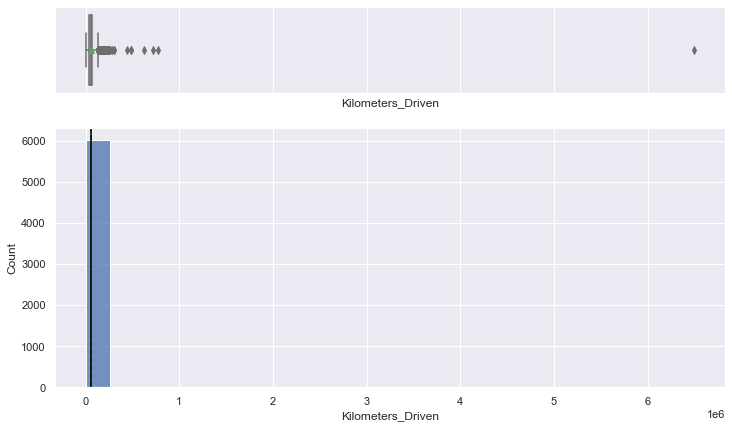

<IPython.core.display.Javascript object>

In [43]:
histogram_boxplot(df_clean, "Kilometers_Driven", bins=25)

* `Kilometers_Driven` is heavily skewed by an outlier.

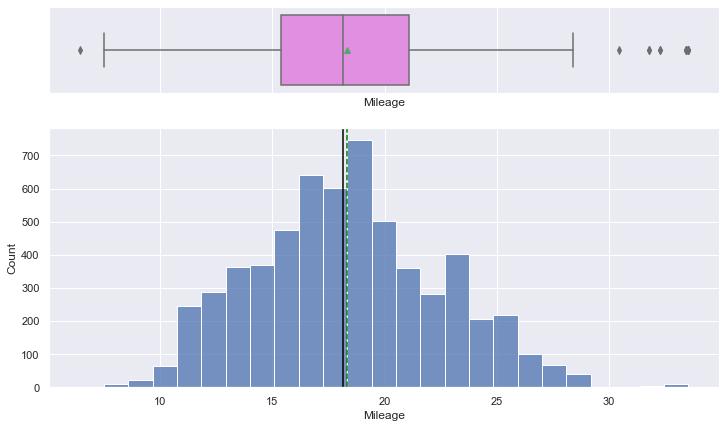

<IPython.core.display.Javascript object>

In [44]:
histogram_boxplot(df_clean, "Mileage", bins=25)

* `Mileage` is close to normally distributed, with a mean of ~18.

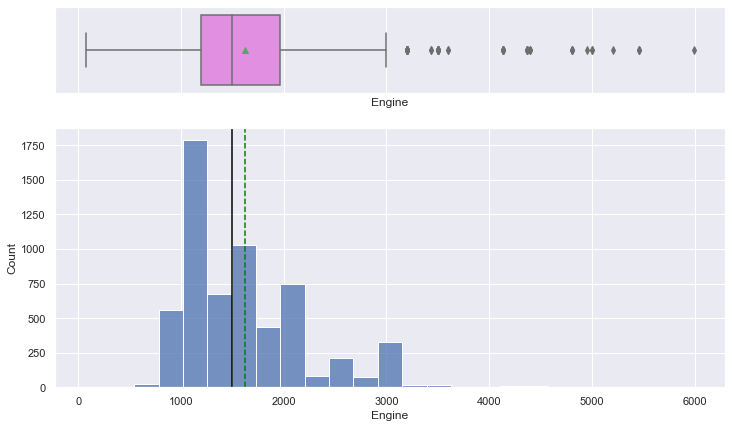

<IPython.core.display.Javascript object>

In [46]:
histogram_boxplot(df_clean, "Engine", bins=25)

* `Engine` capacity in CC is skewed right.

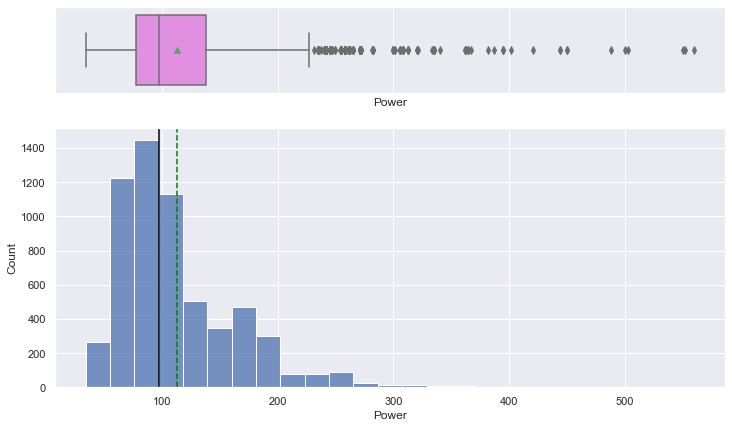

<IPython.core.display.Javascript object>

In [47]:
histogram_boxplot(df_clean, "Power", bins=25)

* `Power` is skewed heavily to the right.

In [48]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

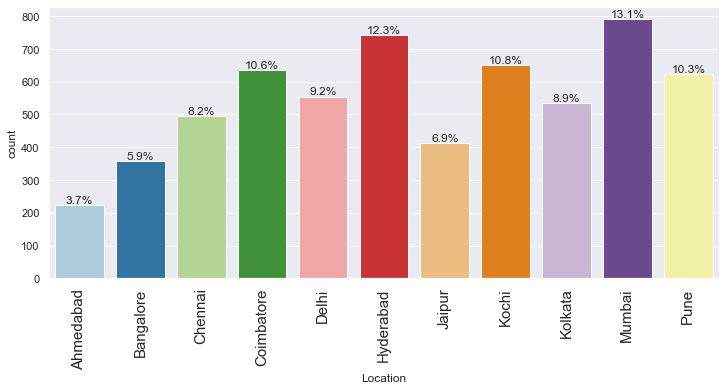

<IPython.core.display.Javascript object>

In [49]:
labeled_barplot(df, "Location", perc=True)

* Cars are spread out fairly evenly, with the highest percentage being in Mumbai

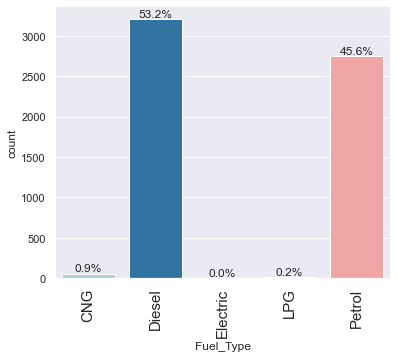

<IPython.core.display.Javascript object>

In [50]:
labeled_barplot(df, "Fuel_Type", perc=True)

* Diesel and Petrol are the most common fuel types seen in used cars.

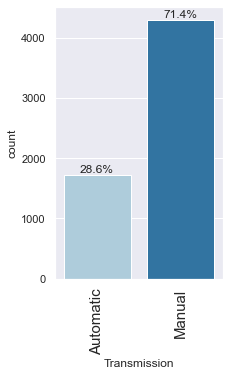

<IPython.core.display.Javascript object>

In [51]:
labeled_barplot(df, "Transmission", perc=True)

* The vast majority of used cars have a manual transmission.

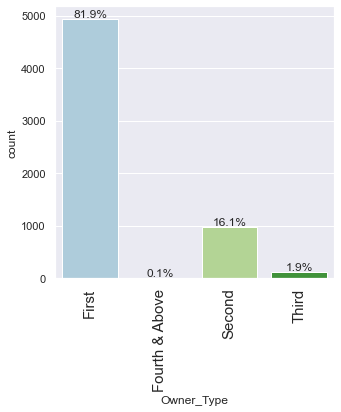

<IPython.core.display.Javascript object>

In [52]:
labeled_barplot(df, "Owner_Type", perc=True)

* The majority of cars have only had one other owner.

# 6. Visualization - Bivariate

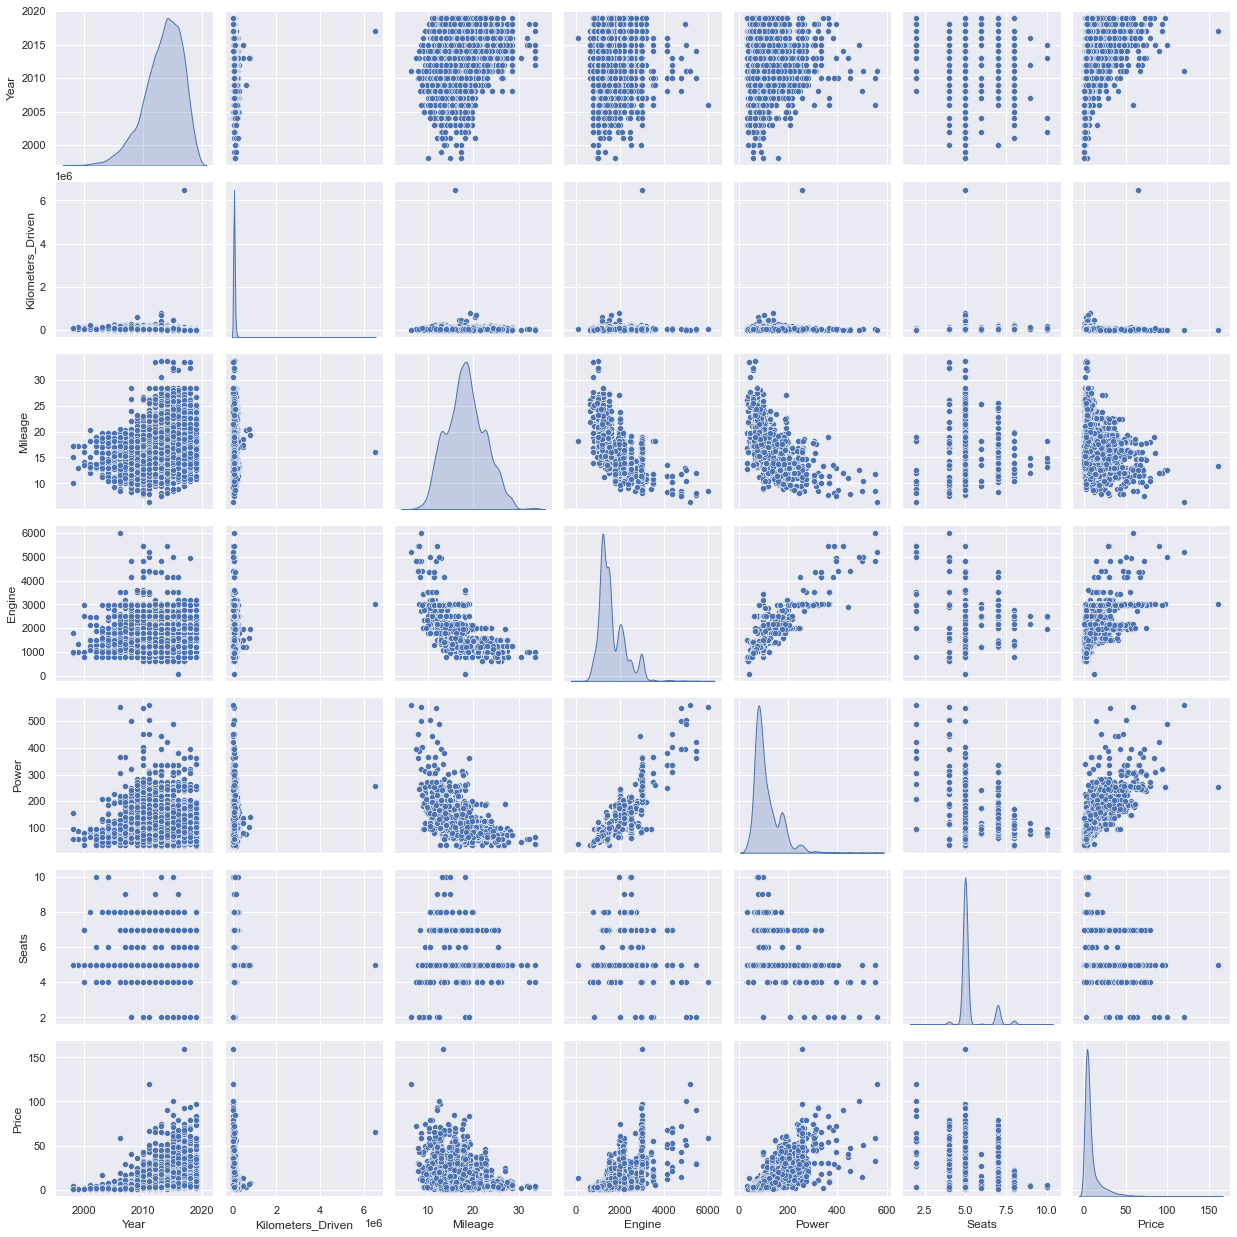

<IPython.core.display.Javascript object>

In [56]:
sns.pairplot(
    data, diag_kind="kde"
)  # to plot density curve instead of histogram on the diag

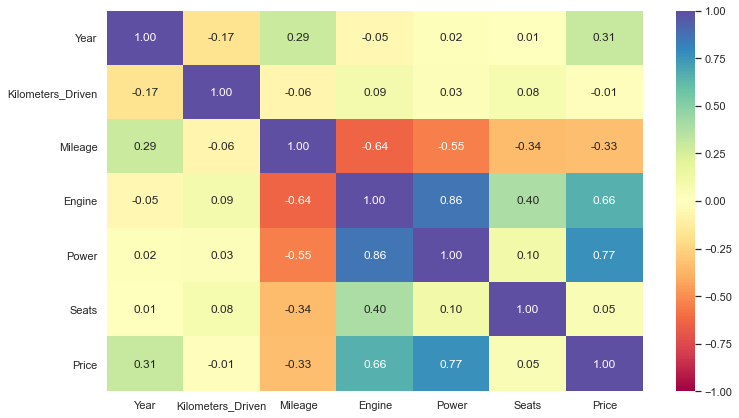

<IPython.core.display.Javascript object>

In [54]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* `Power` and `Engine` columns have a high positive correlation.
* `Power` and `Price` columns have a high positive correlation.
* `Engine` and `Mileage` columns have a high negative correlation.

# 7. Comparing Price to Catergorical Columns

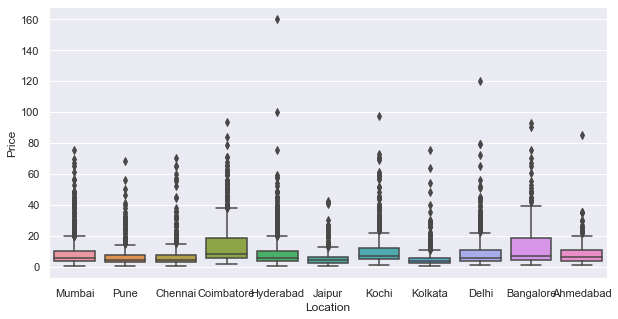

<IPython.core.display.Javascript object>

In [58]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Location", y="Price", data=df)
plt.show()

* Cars on average have a higher cost in Coimbatore and Bangalore.

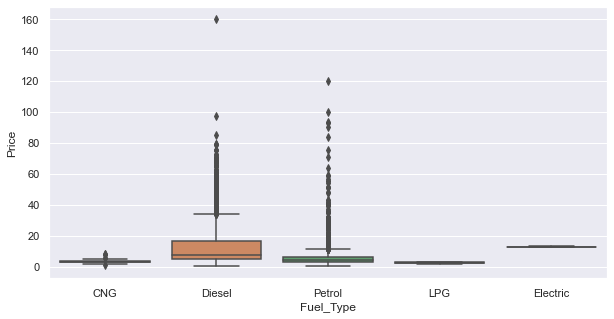

<IPython.core.display.Javascript object>

In [59]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Fuel_Type", y="Price", data=df)
plt.show()

* Diesel Cars are typically more expensive then other fuel types, but electric have the highest median price.

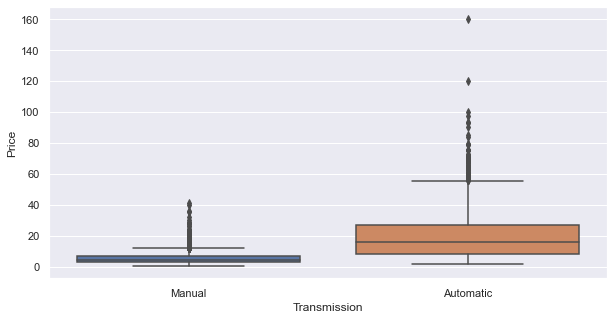

<IPython.core.display.Javascript object>

In [60]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Transmission", y="Price", data=df)
plt.show()

* Automatics tend to cost more then Manuals.

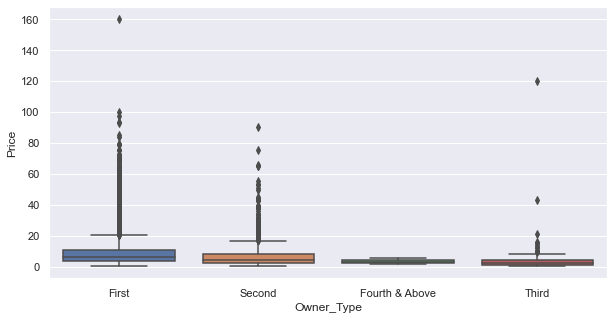

<IPython.core.display.Javascript object>

In [62]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Owner_Type", y="Price", data=df)
plt.show()

* Cars that have only had one owner tend to cost the most.

# 8. Observations

**Data Description:**

- The target variable (`Price`) is of *float* type.
- A majority of columns are objects and need to be cleaned.
- There are few numeric columns.
- There are no duplicate values in the data.
- There are a lot of missing values in the data.


**Data Cleaning:**

- The `S.No` column was dropped as it was a redundant form of the index.
- The `Name` column was eventually dropped as it was a lot of textual description.
- The `New_Price` column was dropped as it was too sparsely populated.
- The `Mileage`, `Engine`, and `Power` columns were converted to floats by dropping their units and converting from string to float using a group of functions.
- Missing values from the `Price` column were dropped as that was my target variable.
- Missing values from other columns were imputed using the median values for the columns.

**Observations from EDA:**

- `Kilometers_Driven` is heavily skewed by an outlier.
- `Mileage` is close to normally distributed, with a mean of ~18
- `Engine` capacity in CC is skewed right.
- `Power` is skewed heavily to the right.
- Cars are spread out fairly evenly, with the highest percentage being in Mumbai.
- Diesel and Petrol are the most common fuel types seen in used cars.
- The vast majority of used cars have a manual transmission.
- The majority of cars have only had one other owner.
- `Power` and `Engine` columns have a high positive correlation.
- `Power` and `Price` columns have a high positive correlation.
- `Engine` and `Mileage` columns have a high negative correlation.
- Cars on average have a higher cost in Coimbatore and Bangalore.
- Diesel Cars are typically more expensive then other fuel types, but electric have the highest median price.
- Automatics tend to cost more then Manuals.
- Cars that have only had one owner tend to cost the most.

# 9. Model Building

In [65]:
# defining my variables and dropping name as it is just text
X = df_clean.drop(["Price", "Name"], axis=1)
y = df_clean["Price"]

<IPython.core.display.Javascript object>

In [66]:
# splitting the data into train and test groups

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [67]:
# getting an idea of my group sizes

print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4213
Number of rows in test data = 1806


<IPython.core.display.Javascript object>

* Not the biggest data set but it should work.

In [68]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [69]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year,0.838937
Kilometers_Driven,-0.000030
Mileage,-0.139517
Engine,0.001059
Power,0.125000
Seats,-0.835523
Bangalore,2.304807
Chennai,1.240883
Coimbatore,2.487537
Delhi,0.078745


<IPython.core.display.Javascript object>

* The location has more of an impact then I had expected.
* There is no suprise that an electric car has a higher correlation as they are in demand in todays market.
* I was also suprised at how high the coefficient is for cars that had four or more owners.

In [70]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [71]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6.255741,3.704975,0.693946,0.692118,74.455028


<IPython.core.display.Javascript object>

In [73]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,7.559198,3.634555,0.518826,0.512068,69.606124


<IPython.core.display.Javascript object>

* The initial model did not do so well when the test group is compared to the train group. The Adj. R-squared dropped dramatically from .69 in the train group to .51 in the test group. The Root Mean Square Error also went up by 1.3 but the Mean Absolute Error fell by 0.07. 

# 10. Forward Feature Selection

In [74]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes "Number of features to select"
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    2.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.6s finished

[2021-11-20 06:22:08] Features: 1/25 -- score: 0.5767726142686697[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.0s finished

[2021-11-20 06:22:08] Features: 2/25 -- score: 0.6586496174970161[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  23 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.0s finished

[2021-11-20 06:22:08] Features: 3/25 -- score: 0.6667544666366872[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  22

<IPython.core.display.Javascript object>

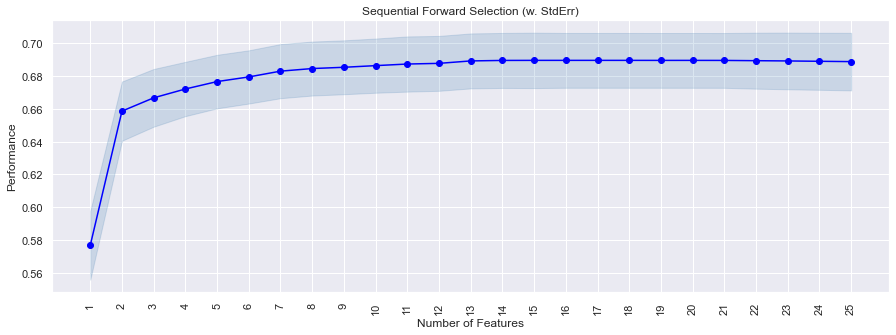

<IPython.core.display.Javascript object>

In [75]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

* 13 features seems to be the point where the graph flattens out

In [76]:
reg = LinearRegression()

# # Build step forward feature selection
sfs = SFS(
    reg,
    k_features=13,
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished

[2021-11-20 06:23:20] Features: 1/13 -- score: 0.5767726142686697[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.0s finished

[2021-11-20 06:23:21] Features: 2/13 -- score: 0.6586496174970161[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  23 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.0s finished

[2021-11-20 06:23:21] Features: 3/13 -- score: 0.6667544666366872[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  22

<IPython.core.display.Javascript object>

In [77]:
# Let us select features which are important
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 4, 5, 6, 7, 8, 10, 11, 15, 19, 20]


<IPython.core.display.Javascript object>

In [78]:
x_train.columns[feat_cols]

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Power', 'Seats', 'Bangalore',
       'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur', 'Pune', 'Petrol',
       'Automatic'],
      dtype='object')

<IPython.core.display.Javascript object>

In [79]:
x_train_final = x_train[x_train.columns[feat_cols]]

<IPython.core.display.Javascript object>

In [80]:
# Creating new x_test with the same 13 variables that we selected for x_train
x_test_final = x_test[x_train_final.columns]

<IPython.core.display.Javascript object>

In [81]:
# Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train_final, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [82]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lin_reg_model2.coef_.flatten(), lin_reg_model2.intercept_),
    index=x_train_final.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year,0.853715
Kilometers_Driven,-0.000028
Mileage,-0.175480
Power,0.132892
Seats,-0.688029
Bangalore,2.588997
Chennai,1.619094
Coimbatore,2.801187
Hyderabad,2.872309
Jaipur,1.717139


<IPython.core.display.Javascript object>

In [83]:
# model performance on train set
print("Training Performance\n")
lin_reg_model2_train_perf = model_performance_regression(
    lin_reg_model2, x_train_final, y_train
)
lin_reg_model2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6.273868,3.72287,0.692169,0.691216,74.54813


<IPython.core.display.Javascript object>

In [84]:
# model performance on test set
print("Test Performance\n")
lin_reg_model2_test_perf = model_performance_regression(
    lin_reg_model2, x_test_final, y_test
)
lin_reg_model2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,7.416653,3.659027,0.536802,0.533442,69.476776


<IPython.core.display.Javascript object>

In [85]:
# training performance comparison

models_train_comp_df = pd.concat(
    [lin_reg_model_train_perf.T, lin_reg_model2_train_perf.T], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,6.255741,6.273868
MAE,3.704975,3.722870
R-squared,0.693946,0.692169
Adj. R-squared,0.692118,0.691216
MAPE,74.455028,74.548130


<IPython.core.display.Javascript object>

In [86]:
# test performance comparison

models_test_comp_df = pd.concat(
    [lin_reg_model_test_perf.T, lin_reg_model2_test_perf.T], axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,7.559198,7.416653
MAE,3.634555,3.659027
R-squared,0.518826,0.536802
Adj. R-squared,0.512068,0.533442
MAPE,69.606124,69.476776


<IPython.core.display.Javascript object>

* Looking at the comparisons of both the Train and Test sets betweeen my original model and the SFS model, the SFS model did slightly better. There is less discrepancy between the Train and Test sets. The adj R-squared fell from .69 to .53 which barely edged out the original. The Root Mean Square Error gap closed when using the SFS model as well.